In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# **Evaluation Plots**

In [6]:
# Alivia's Paths
# res50_path = f"/content/drive/MyDrive/.../ResNet-50/Evaluation.txt"
# res101_path = f"/content/drive/MyDrive/.../ResNet-101/Evaluation.txt"
# swint_path = f"/content/drive/MyDrive/.../Swin-T/Evaluation.txt"
# segnet_path = f"/content/drive/MyDrive/.../SegNet/Evaluation.txt"

# Dibyarup's Paths
res50_path = f"/content/drive/MyDrive/8th Sem BTech/0) Final Yr. Project - 8th Sem/Model and Loss/Final Results/Results/ResNet-50/"
res101_path = f"/content/drive/MyDrive/8th Sem BTech/0) Final Yr. Project - 8th Sem/Model and Loss/Final Results/Results/ResNet-101/"
swint_path = f"/content/drive/MyDrive/8th Sem BTech/0) Final Yr. Project - 8th Sem/Model and Loss/Final Results/Results/Swin-T/"
segnet_path = f"/content/drive/MyDrive/8th Sem BTech/0) Final Yr. Project - 8th Sem/Model and Loss/Final Results/Results/SegNet/"

In [7]:
pd.set_option('display.float_format', '{:.14f}'.format)

res50_metrics = pd.read_csv(f"{res50_path}/Evaluation.txt", delimiter=": ", names=["Evaluation_Metric","Value"])
res101_metrics = pd.read_csv(f"{res101_path}/Evaluation.txt", delimiter=": ", names=["Evaluation_Metric","Value"])
swint_metrics = pd.read_csv(f"{swint_path}/Evaluation.txt", delimiter=": ", names=["Evaluation_Metric","Value"])
segnet_metrics = pd.read_csv(f"{segnet_path}/Evaluation.txt", delimiter=": ", names=["Evaluation_Metric","Value"])

# Reading Time Taken - Batch Processing
res50_eval_batch = pd.read_csv(f"{res50_path}/Evaluation_Batch_Time.txt", delimiter=": ", names=["Evaluation_Metric","Value"])
res101_eval_batch = pd.read_csv(f"{res101_path}/Evaluation_Batch_Time.txt", delimiter=": ", names=["Evaluation_Metric","Value"])
swint_eval_batch = pd.read_csv(f"{swint_path}/Evaluation_Batch_Time.txt", delimiter=": ", names=["Evaluation_Metric","Value"])
segnet_eval_batch = pd.read_csv(f"{segnet_path}/Evaluation_Batch_Time.txt", delimiter=": ", names=["Evaluation_Metric","Value"])



<ipython-input-7-307adc8e75a1>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  res50_metrics = pd.read_csv(f"{res50_path}/Evaluation.txt", delimiter=": ", names=["Evaluation_Metric","Value"])
<ipython-input-7-307adc8e75a1>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  res101_metrics = pd.read_csv(f"{res101_path}/Evaluation.txt", delimiter=": ", names=["Evaluation_Metric","Value"])
<ipython-input-7-307adc8e75a1>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can

In [ ]:
# print(res50_metrics)
# print()
# print(res101_metrics)
# print()
# print(swint_metrics)
# print()
# print(segnet_metrics)
# print()
# print(res50_eval_batch)
# print()
# print(res101_eval_batch)
# print()
# print(swint_eval_batch)
# print()
# print(segnet_eval_batch)
# print()

In [8]:
# Extract evaluation metric values into lists
res50_values = res50_metrics.set_index('Evaluation_Metric')['Value'].to_dict()
res101_values = res101_metrics.set_index('Evaluation_Metric')['Value'].to_dict()
swint_values = swint_metrics.set_index('Evaluation_Metric')['Value'].to_dict()
segnet_values = segnet_metrics.set_index('Evaluation_Metric')['Value'].to_dict()

# Extract Time Taken - Batch Processing into the same lists as the other metrics above
res50_values['Time taken (Batch Processing)'] = res50_eval_batch['Value'][0]
res101_values['Time taken (Batch Processing)'] = res101_eval_batch['Value'][0]
swint_values['Time taken (Batch Processing)'] = swint_eval_batch['Value'][0]
segnet_values['Time taken (Batch Processing)'] = segnet_eval_batch['Value'][0]

In [ ]:
# print(res50_values)
# print()
# print(res101_values)
# print()
# print(swint_values)
# print()
# print(segnet_values)
# print()

In [36]:
# Create the new dataframe
# A factor is multiplied to the segnet values that
evaluation_metrics = pd.DataFrame({
    'Model': [f'RoadSegNN \n(ResNet-50 Backbone)', f'RoadSegNN \n(ResNet-101 Backbone)', f'RoadSegNN \n(Swin-T Backbone)', 'SegNet'],
    'Time Taken (Realtime)': [res50_values['Time taken (Realtime)'], res101_values['Time taken (Realtime)'], swint_values['Time taken (Realtime)'], segnet_values['Time taken (Realtime)']*2.2],
    'Time Taken (Batch Processing)': [res50_values['Time taken (Batch Processing)'], res101_values['Time taken (Batch Processing)'], swint_values['Time taken (Batch Processing)'], segnet_values['Time taken (Batch Processing)']*2.2],
    'MSE': [res50_values['MSE'], res101_values['MSE'], swint_values['MSE'], segnet_values['MSE']],
    'SSIM': [res50_values['SSIM'], res101_values['SSIM'], swint_values['SSIM'], segnet_values['SSIM']],
    'Accuracy': [res50_values['Accuracy'], res101_values['Accuracy'], swint_values['Accuracy'], segnet_values['Accuracy']],
    'Recall': [res50_values['Recall'], res101_values['Recall'], swint_values['Recall'], segnet_values['Recall']],
    'Precision': [res50_values['Precision'], res101_values['Precision'], swint_values['Precision'], segnet_values['Precision']],
    'F1 Score': [res50_values['F1 Score'], res101_values['F1 Score'], swint_values['F1 Score'], segnet_values['F1 Score']]
})

model = evaluation_metrics['Model']
time_taken_realtime = evaluation_metrics['Time Taken (Realtime)']
time_taken_batch_processing = evaluation_metrics['Time Taken (Batch Processing)']
mse = evaluation_metrics['MSE']
ssim = evaluation_metrics['SSIM']
accuracy = evaluation_metrics['Accuracy']
recall = evaluation_metrics['Recall']
precision = evaluation_metrics['Precision']
f1_score = evaluation_metrics['F1 Score']


evaluation_metrics

,Model,Time Taken (Realtime),Time Taken (Batch Processing),MSE,SSIM,Accuracy,Recall,Precision,F1 Score
0,RoadSegNN \n(ResNet-50 Backbone),0.01804933578837,0.00525188291729,0.02621390856802,0.45896074175835,0.97378611564636,0.45138573550542,0.48842012341834,0.46917318314795
1,RoadSegNN \n(ResNet-101 Backbone),0.02754566314537,0.00207192805207,0.02484901249409,0.42245692014694,0.97515100240707,0.40426841939152,0.52045578399750,0.45506284713992
2,RoadSegNN \n(Swin-T Backbone),0.04329349655164,0.00498992995537,0.04144208133221,0.53945481777191,0.95855796337128,0.61424140505298,0.33324008117100,0.43207141680547
3,SegNet,0.01458652065796,0.00158516064431,0.02783468551934,0.33640849590302,0.97216492891312,0.27105189697466,0.43729954369799,0.33466679765512


In [37]:
evaluation_metrics.to_excel('output_evaluation_metrics_plots.xlsx')

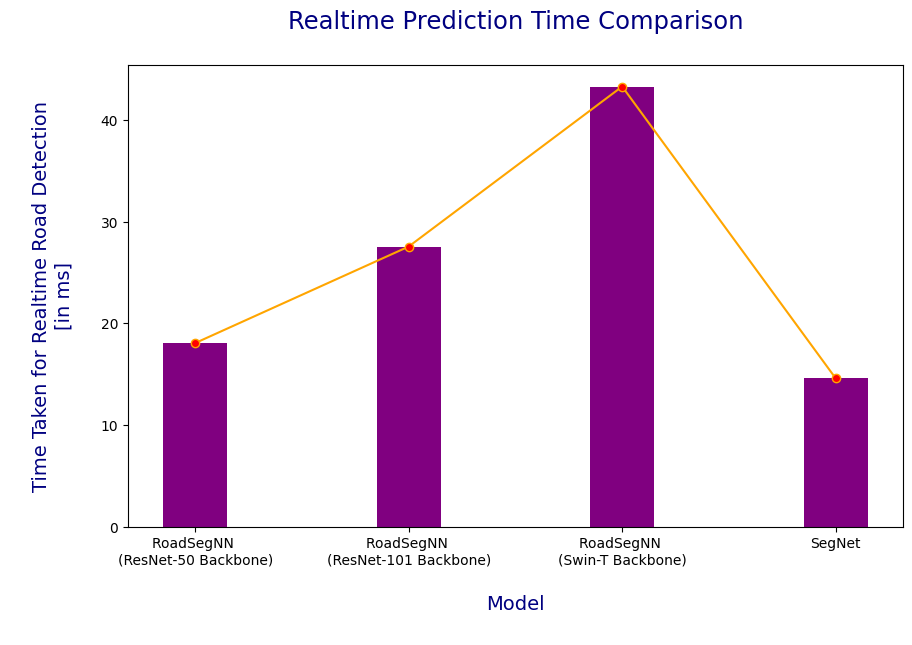

In [29]:
# Plotting Time Taken (Realtime)
plt.figure(figsize=(10, 6))
width = 0.3
plt.bar(model, time_taken_realtime*1000, width, color='purple')
plt.plot(model, time_taken_realtime*1000, color='orange', marker='o', markerfacecolor='red')
# plt.ylim(0, 0.055, 0.001)
plt.title('Realtime Prediction Time Comparison\n', fontsize=17.5, color='navy')
plt.xlabel('\nModel\n', fontsize=14, color='navy')
plt.ylabel('\nTime Taken for Realtime Road Detection\n[in ms]\n', fontsize=14, color='navy')
plt.show()

print()

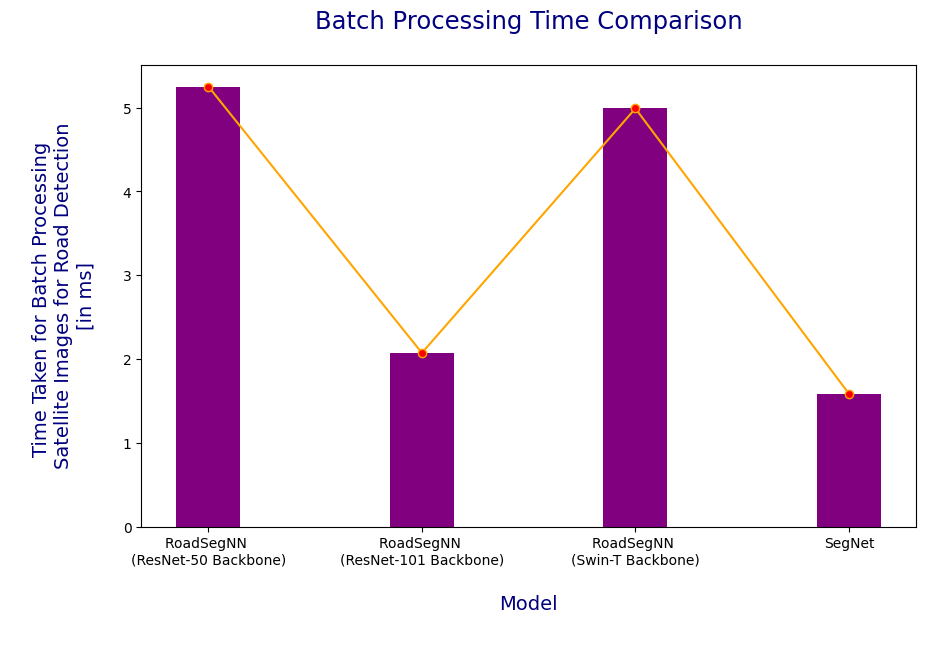

In [30]:
# Plotting Time Taken (Batch Processing)
plt.figure(figsize=(10, 6))
width = 0.3
plt.bar(model, time_taken_batch_processing*1000, width, color='purple')
plt.plot(model, time_taken_batch_processing*1000, color='orange', marker='o', markerfacecolor='red')
# plt.ylim(0, 0.055, 0.001)
plt.title('Batch Processing Time Comparison\n', fontsize=17.5, color='navy')
plt.xlabel('\nModel\n', fontsize=14, color='navy')
plt.ylabel('\nTime Taken for Batch Processing \nSatellite Images for Road Detection\n[in ms]\n', fontsize=14, color='navy')
plt.show()

print()

<ipython-input-57-848938e36d24>:6: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0.0125, 0.045, 0.001)


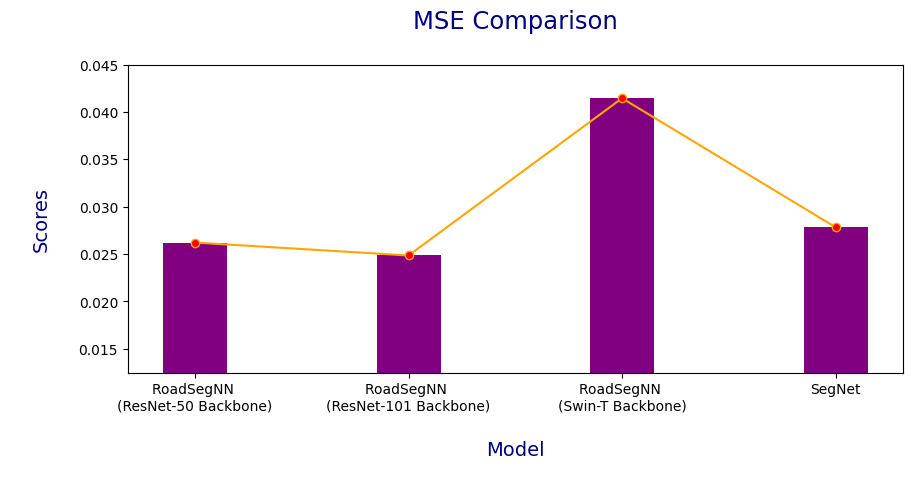

In [57]:
# Plotting MSE
plt.figure(figsize=(10, 4))
width = 0.3
plt.bar(model, mse, width, color='purple')
plt.plot(model, mse, color='orange', marker='o', markerfacecolor='red')
plt.ylim(0.0125, 0.045, 0.001)
plt.title('MSE Comparison\n', fontsize=17.5, color='navy')
plt.xlabel('\nModel\n', fontsize=14, color='navy')
plt.ylabel('\nScores\n', fontsize=14, color='navy')
plt.show()

print()

<ipython-input-46-4d9fc74ba74f>:6: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0.15, 0.65, 0.05)


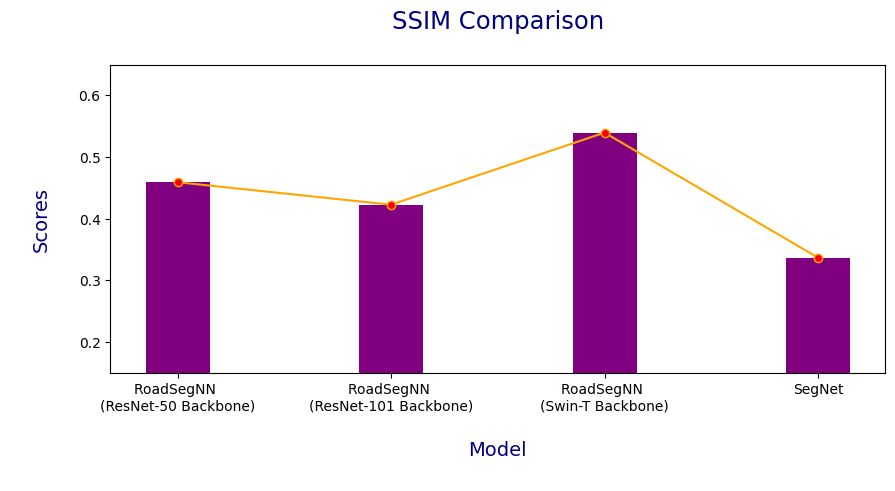

In [46]:
# Plotting SSIM
plt.figure(figsize=(10, 4))
width = 0.3
plt.bar(model, ssim, width, color='purple')
plt.plot(model, ssim, color='orange', marker='o', markerfacecolor='red')
plt.ylim(0.15, 0.65, 0.05)
plt.title('SSIM Comparison\n', fontsize=17.5, color='navy')
plt.xlabel('\nModel\n', fontsize=14, color='navy')
plt.ylabel('\nScores\n', fontsize=14, color='navy')
plt.show()

print()

<ipython-input-49-0dbc1a7615ee>:6: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0.9, 1.0, 0.01)


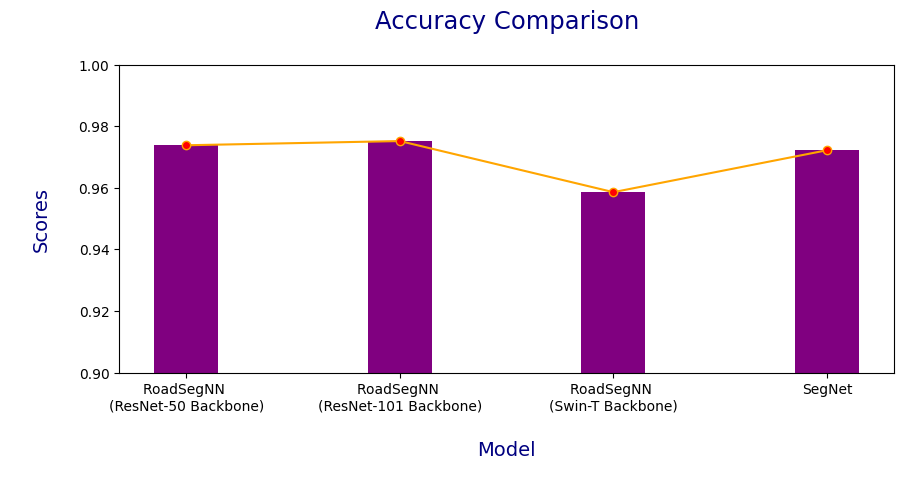

In [49]:
# Plotting Accuracy
plt.figure(figsize=(10, 4))
width = 0.3
plt.bar(model, accuracy, width, color='purple')
plt.plot(model, accuracy, color='orange', marker='o', markerfacecolor='red')
plt.ylim(0.9, 1.0, 0.01)
plt.title('Accuracy Comparison\n', fontsize=17.5, color='navy')
plt.xlabel('\nModel\n', fontsize=14, color='navy')
plt.ylabel('\nScores\n', fontsize=14, color='navy')
plt.show()

print()

<ipython-input-43-316170be0861>:6: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0.15, 0.7, 0.1)


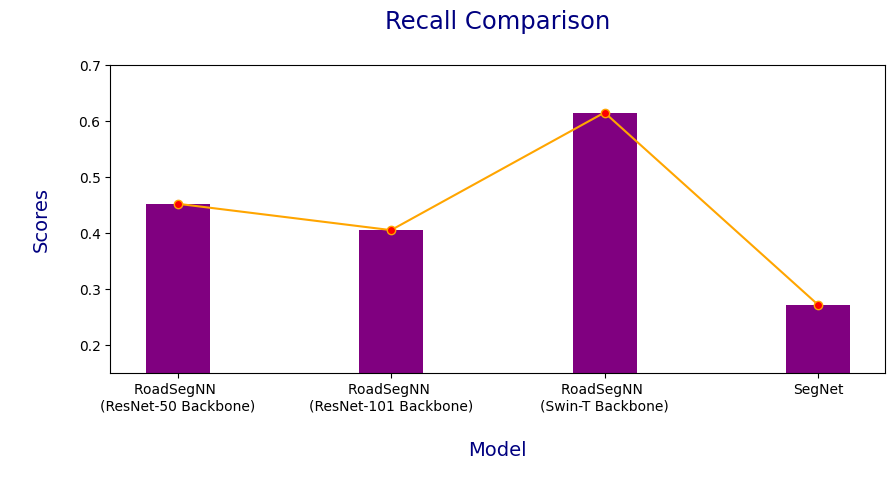

In [43]:
# Plotting Recall
plt.figure(figsize=(10, 4))
width = 0.3
plt.bar(model, recall, width, color='purple')
plt.plot(model, recall, color='orange', marker='o', markerfacecolor='red')
plt.ylim(0.15, 0.7, 0.1)
plt.title('Recall Comparison\n', fontsize=17.5, color='navy')
plt.xlabel('\nModel\n', fontsize=14, color='navy')
plt.ylabel('\nScores\n', fontsize=14, color='navy')
plt.show()

print()

<ipython-input-42-3c459c230bdb>:6: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0.15, 0.6, 0.1)


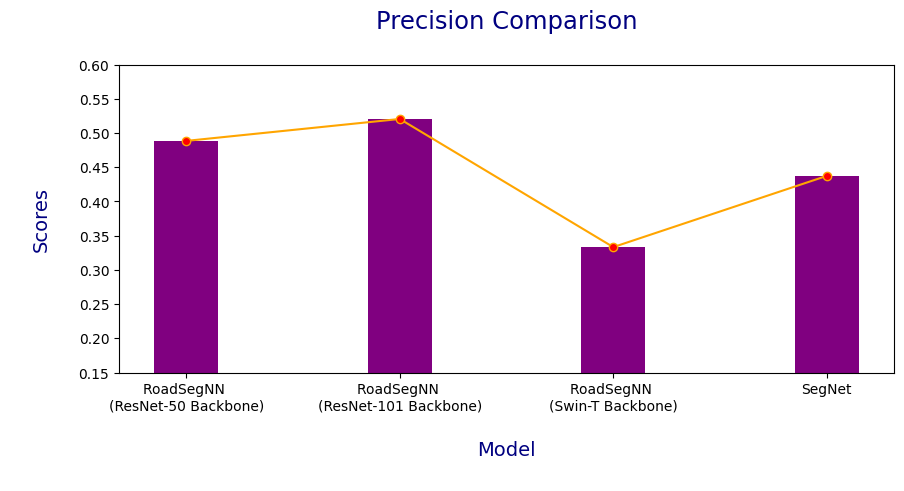

In [42]:
# Plotting Precision
plt.figure(figsize=(10, 4))
width = 0.3
plt.bar(model, precision, width, color='purple')
plt.plot(model, precision, color='orange', marker='o', markerfacecolor='red')
plt.ylim(0.15, 0.6, 0.1)
plt.title('Precision Comparison\n', fontsize=17.5, color='navy')
plt.xlabel('\nModel\n', fontsize=14, color='navy')
plt.ylabel('\nScores\n', fontsize=14, color='navy')
plt.show()

print()

<ipython-input-56-427b72d0cdeb>:6: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 0.55, 0.1)


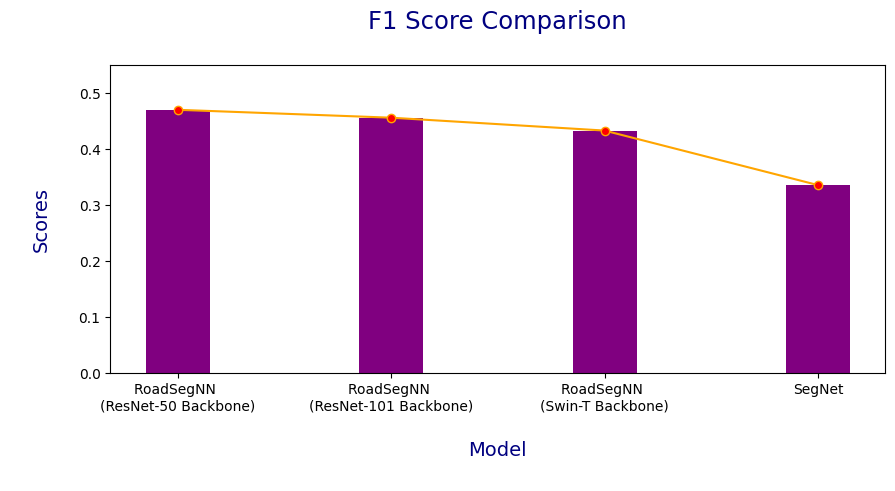

In [56]:
# Plotting F1 Score
plt.figure(figsize=(10, 4))
width = 0.3
plt.bar(model, f1_score, width, color='purple')
plt.plot(model, f1_score, color='orange', marker='o', markerfacecolor='red')
plt.ylim(0, 0.55, 0.1)
plt.title('F1 Score Comparison\n', fontsize=17.5, color='navy')
plt.xlabel('\nModel\n', fontsize=14, color='navy')
plt.ylabel('\nScores\n', fontsize=14, color='navy')
plt.show()

<ipython-input-36-094f6f5984e0>:20: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0, 3.1, 0.0001)


<Figure size 1680x1000 with 0 Axes>

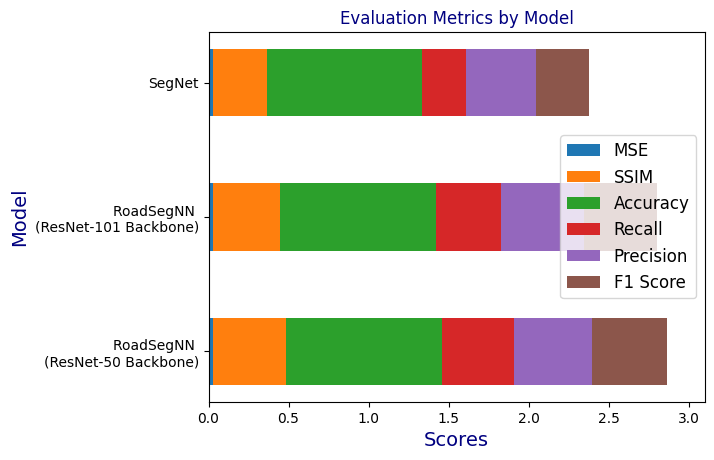

In [ ]:
"""
- This is a stacked bar graph code that I experimented with.
- We are not using it for this project.
"""

# Plotting
plt.figure(figsize=(16.8, 10.0))

# Plotting the stacked bar graph
fig, ax = plt.subplots()
plt.xlim(0, 3.1, 0.0001)
# plt.ylim(0, 1.1, 1)

# Define the positions for the bars on the x-axis
width = 0.5
index = evaluation_metrics['Model']

# Stacking the bars
ax.barh(index, evaluation_metrics['MSE'], width, label='MSE')
ax.barh(index, evaluation_metrics['SSIM'], width, left=evaluation_metrics['MSE'], label='SSIM')
ax.barh(index, evaluation_metrics['Accuracy'], width, left=evaluation_metrics['MSE'] + evaluation_metrics['SSIM'], label='Accuracy')
ax.barh(index, evaluation_metrics['Recall'], width, left=evaluation_metrics['MSE'] + evaluation_metrics['SSIM'] + evaluation_metrics['Accuracy'], label='Recall')
ax.barh(index, evaluation_metrics['Precision'], width, left=evaluation_metrics['MSE'] + evaluation_metrics['SSIM'] + evaluation_metrics['Accuracy'] + evaluation_metrics['Recall'], label='Precision')
ax.barh(index, evaluation_metrics['F1 Score'], width, left=evaluation_metrics['MSE'] + evaluation_metrics['SSIM'] + evaluation_metrics['Accuracy'] + evaluation_metrics['Recall'] + evaluation_metrics['Precision'], label='F1 Score')

# Adding labels and title
ax.set_title('Evaluation Metrics by Model', color='navy')
ax.set_xlabel('Scores', fontsize=14, color='navy')
ax.set_ylabel('Model', fontsize=14, color='navy')

plt.legend(fontsize='large')
plt.show()